In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

input_image_path = cv2.imread('Thoughts.jpg')

# Define the scaling factor
scaling_factor = 0.7  # You can adjust this value as needed

# Calculate the new dimensions
new_width = int(input_image_path.shape[1] * scaling_factor)
new_height = int(input_image_path.shape[0] * scaling_factor)

# Resize the image using the new dimensions
scaled_image = cv2.resize(input_image_path, (new_width, new_height))

#grayscale the image
grayScale = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Graysacle', grayScale)
cv2.waitKey(0)
cv2.destroyAllWindows()

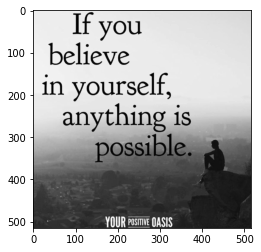

In [2]:
#Noise removal function
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

no_noise = noise_removal(grayScale)
# cv2.imwrite("preprocess/no_noise.jpg", no_noise)

plt.imshow(grayScale,'gray',vmin=0,vmax=255)
cv2.imshow('noiseReduction', no_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#Thresholding
T, B1 = cv2.threshold(no_noise, thresh = 125, maxval = 255, type = cv2.THRESH_BINARY)

In [4]:
# Adaptive Threshold
B = cv2.adaptiveThreshold(no_noise, maxValue = 255,
                        adaptiveMethod = cv2. ADAPTIVE_THRESH_GAUSSIAN_C,
                         thresholdType = cv2.THRESH_BINARY,
                             blockSize = 5, C = 10)

In [5]:
cv2.imshow("threshold", B1)
cv2.imshow("Adpative thresholding", B)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [6]:
#Thicking the image //So far we don't using thicking
def Thicken(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
    
eroded_image = Thicken(B)

cv2.imshow('Thicking', eroded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
#Histogram
dst = cv2.equalizeHist(B)
cv2.imshow("Orig", scaled_image)
cv2.imshow("Equal Hist", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(-1)

-1

In [ ]:
# cv2.imshow('Graysacle', grayScale)
# cv2.imshow('noiseReduction', no_noise)
# cv2.imshow("threshold", B1)
# cv2.imshow("Adpative thresholding", B)
# cv2.imshow('Eroded_image', eroded_image)
# cv2.imshow("Equal Hist", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(-1)